In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

## Loading MNIST dataset

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

## Normalize dataset

In [5]:
x_train, x_test = x_train / 255, x_test / 255

## Resizing images to make it suitable for CNN

In [6]:
import numpy as np
IMG_SIZE = 28
x_train_r = x_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_test_r = x_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print(x_test_r.shape, x_train_r.shape)

(10000, 28, 28, 1) (60000, 28, 28, 1)


## Creating a Deep Neural Network

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [19]:
model = Sequential()

#First convolution layer
model.add(Conv2D(64, (3,3), activation='relu', input_shape = x_train_r.shape[1:])) #2D layer 1 -> 64 filters
model.add(MaxPooling2D(pool_size=(2,2)))

#Second convolution layer
model.add(Conv2D(64, (3,3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2,2)))

#Third convolution layer
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Dropout layer - 20% of the neurons are turned off randomly to prevent overfitting
model.add(Dropout(0.2))
#Fully connected Layer nr 1
model.add(Flatten()) 
model.add(Dense(64))
model.add(Activation('relu'))

#Fully connected Layer nr 2
model.add(Dense(32))
model.add(Activation('relu'))

#Fully connected Layer nr 3
model.add(Dense(10))
model.add(Activation('softmax')) #there are 10 numbers to classify

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 64)          0

In [20]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [21]:
model.fit(x_train_r, y_train, epochs=10, validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 18s 13ms/step - loss: 0.2117 - accuracy: 0.9322 - val_loss: 0.0784 - val_accuracy: 0.9758
Epoch 2/10
1313/1313 [==============================] - 21s 16ms/step - loss: 0.0603 - accuracy: 0.9817 - val_loss: 0.0453 - val_accuracy: 0.9854
Epoch 3/10
1313/1313 [==============================] - 23s 17ms/step - loss: 0.0458 - accuracy: 0.9854 - val_loss: 0.0419 - val_accuracy: 0.9867
Epoch 4/10
1313/1313 [==============================] - 19s 15ms/step - loss: 0.0363 - accuracy: 0.9879 - val_loss: 0.0380 - val_accuracy: 0.9874
Epoch 5/10
1313/1313 [==============================] - 21s 16ms/step - loss: 0.0287 - accuracy: 0.9910 - val_loss: 0.0386 - val_accuracy: 0.9883
Epoch 6/10
1313/1313 [==============================] - 19s 15ms/step - loss: 0.0272 - accuracy: 0.9917 - val_loss: 0.0403 - val_accuracy: 0.9878
Epoch 7/10
1313/1313 [==============================] - 20s 15ms/step - loss: 0.0223 - accuracy: 0.9928 - val_loss: 0.0331 -

## My own data

In [12]:
import cv2

In [13]:
own_digits = np.empty((100, 28, 28))
path = '../python_test/own 0-9 dataset/resized/'
for i in range(100):
    digit = cv2.imread(path + str(i) + '.png', cv2.IMREAD_GRAYSCALE)
    digit = digit / 255
    own_digits[i] = digit
y_own_digits = np.empty(100)
for i, digit in enumerate(own_digits):
    y_own_digits[i] = i // 10

1/1 [==============================] - 0s 19ms/step
Test set: Accuracy: 0.9


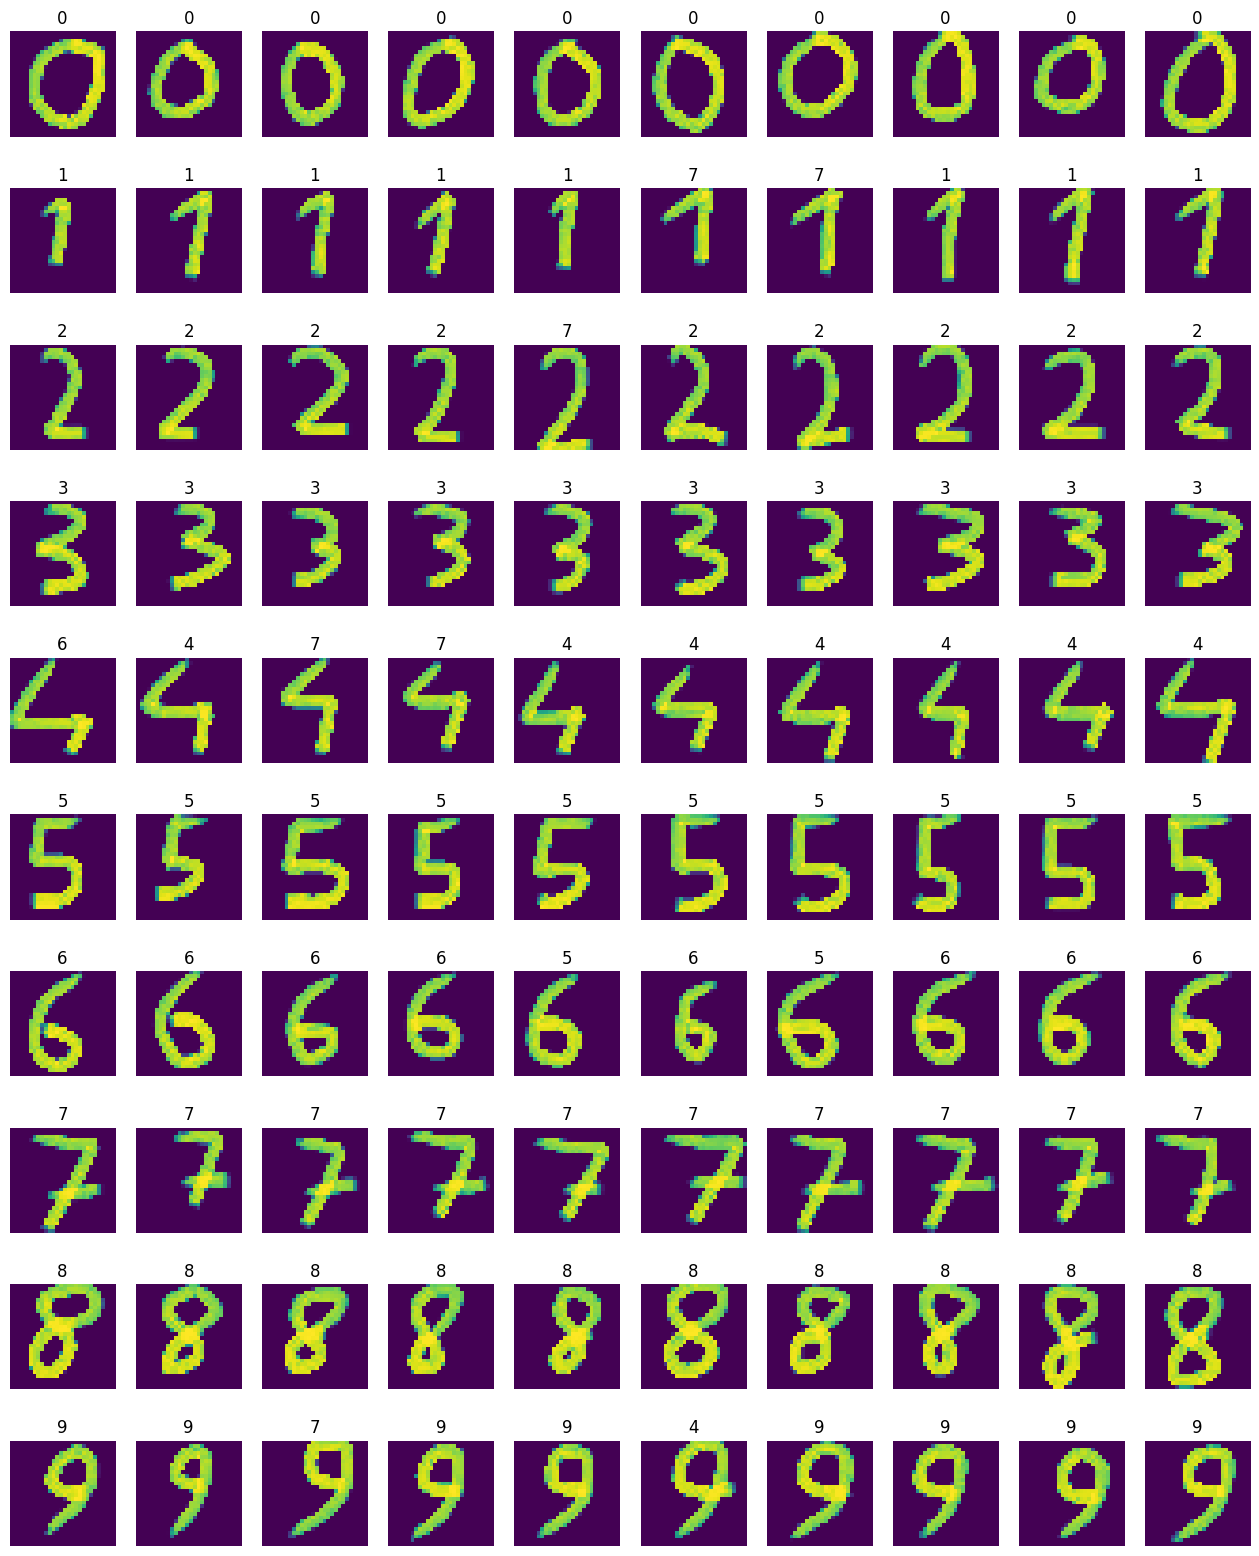

In [22]:
fig, axes = plt.subplots(10,10, figsize=(16,20))
correct = 0
for i, ax in enumerate(axes.flat):
    prediction = model.predict(own_digits[i].reshape((-1, 28, 28, 1)))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    if yhat == y_own_digits[i]:
        correct += 1
    ax.imshow(own_digits[i])
    ax.set_title(f"{yhat}")
    ax.set_axis_off() 
print(f'Test set: Accuracy: {correct/y_own_digits.shape[0]}')

## Visualization of CNN layers

1/1 [==============================] - 0s 51ms/step


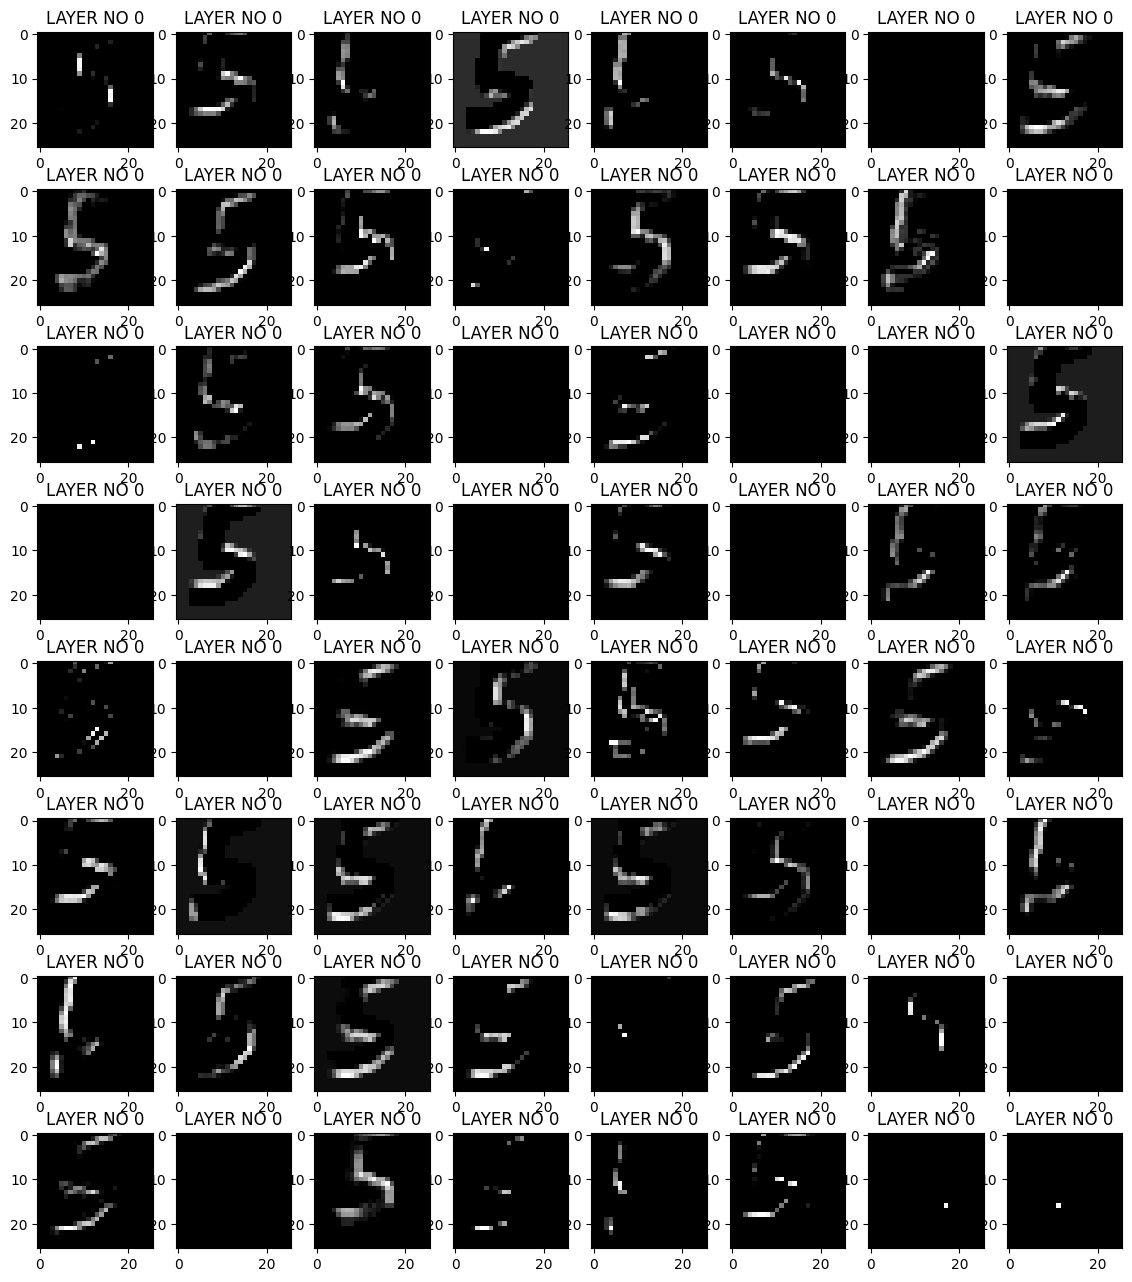

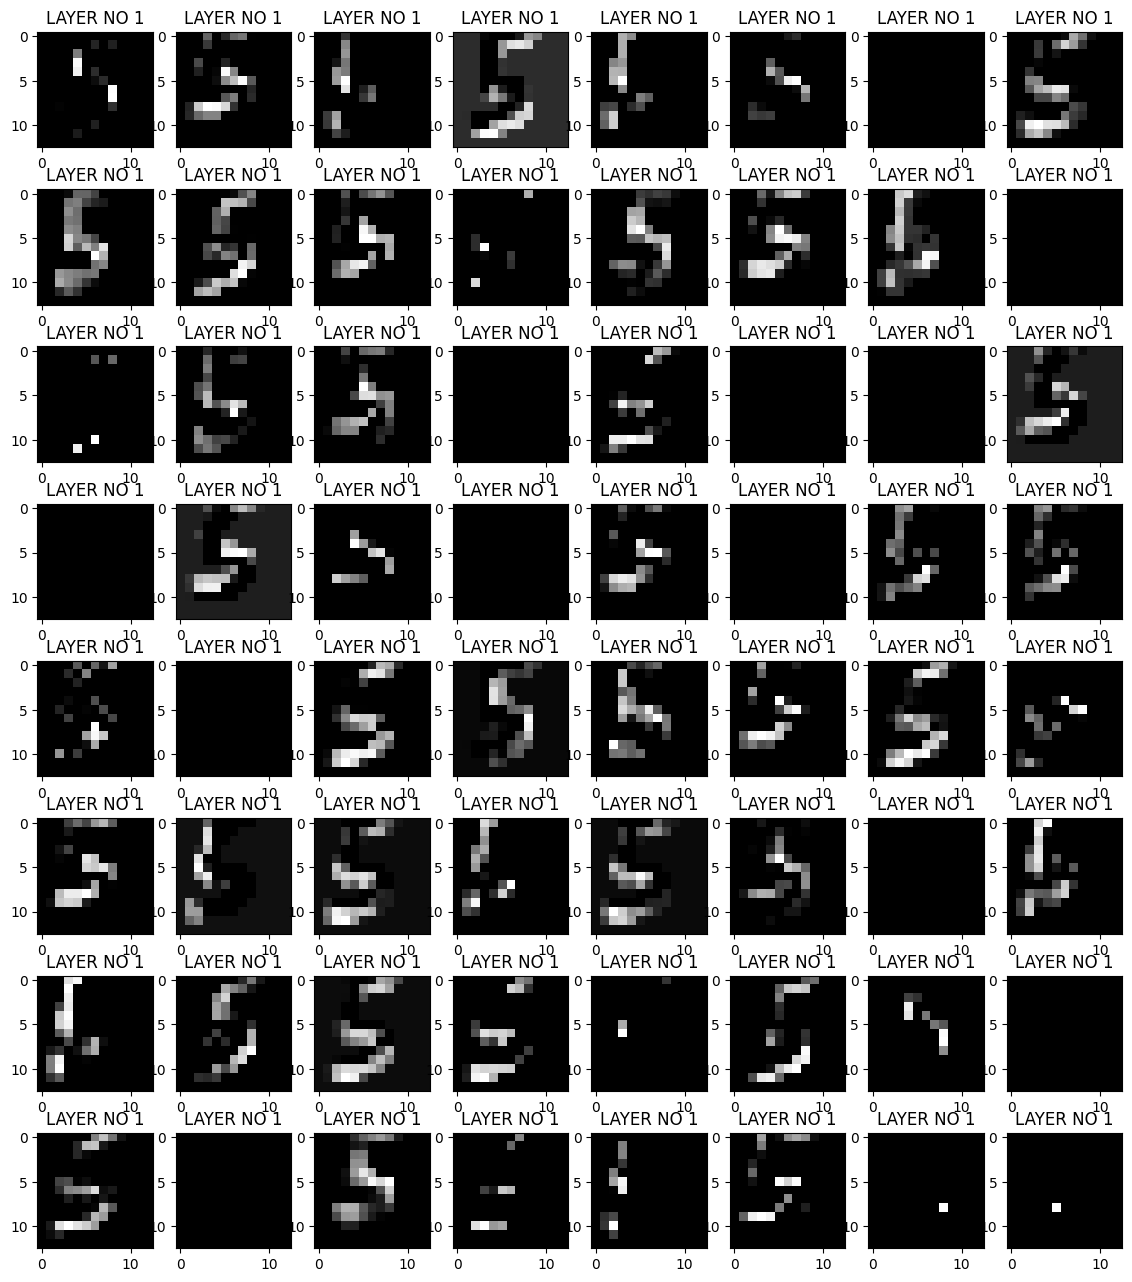

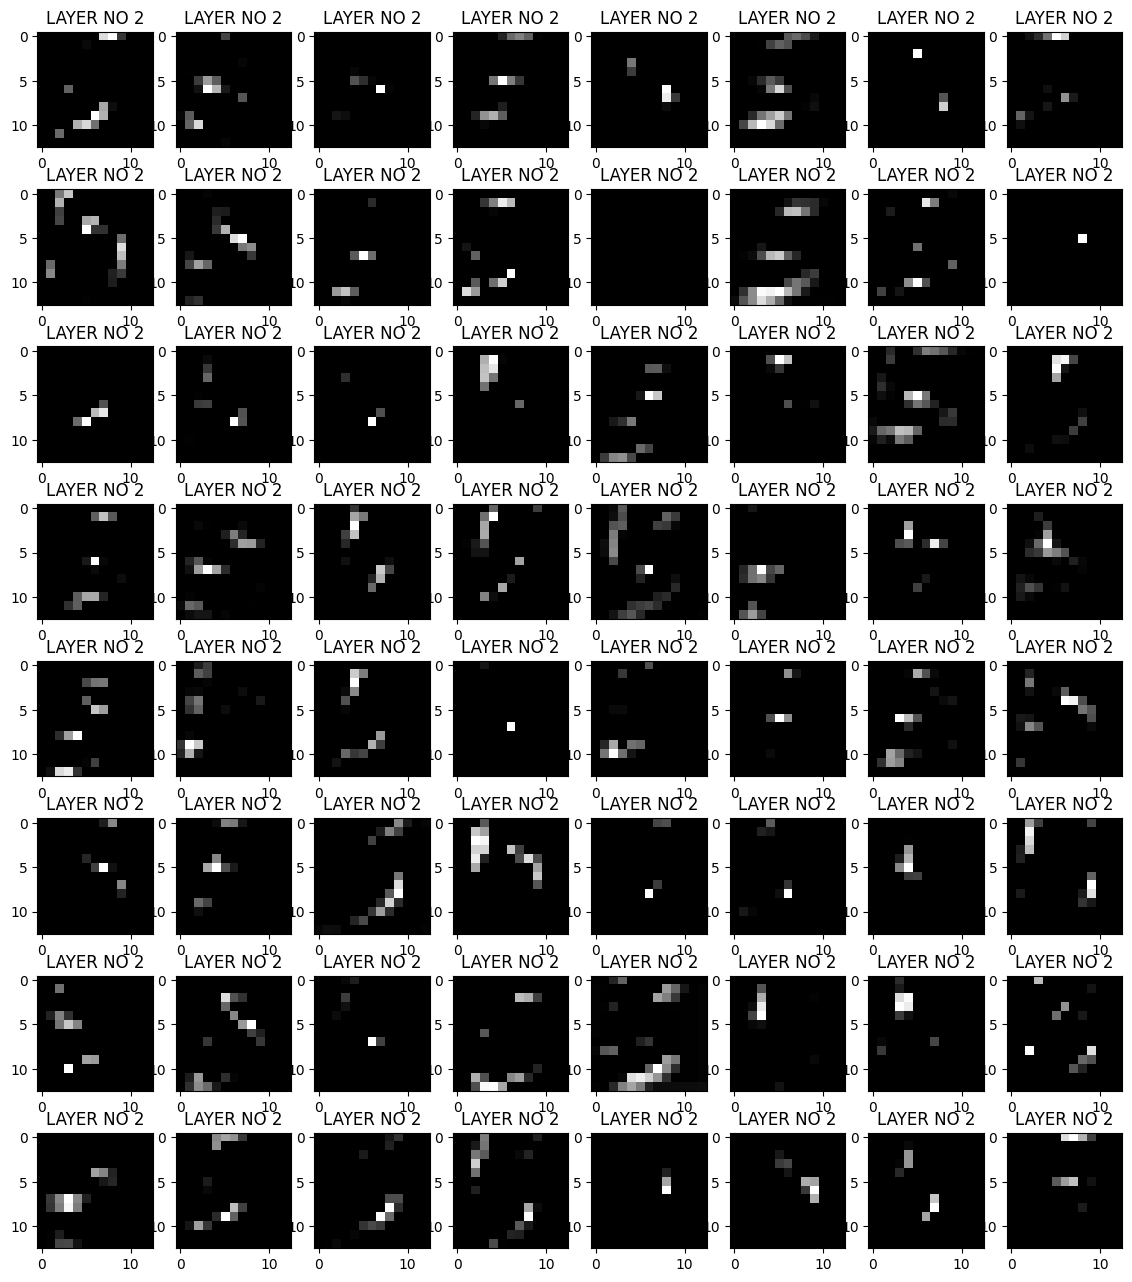

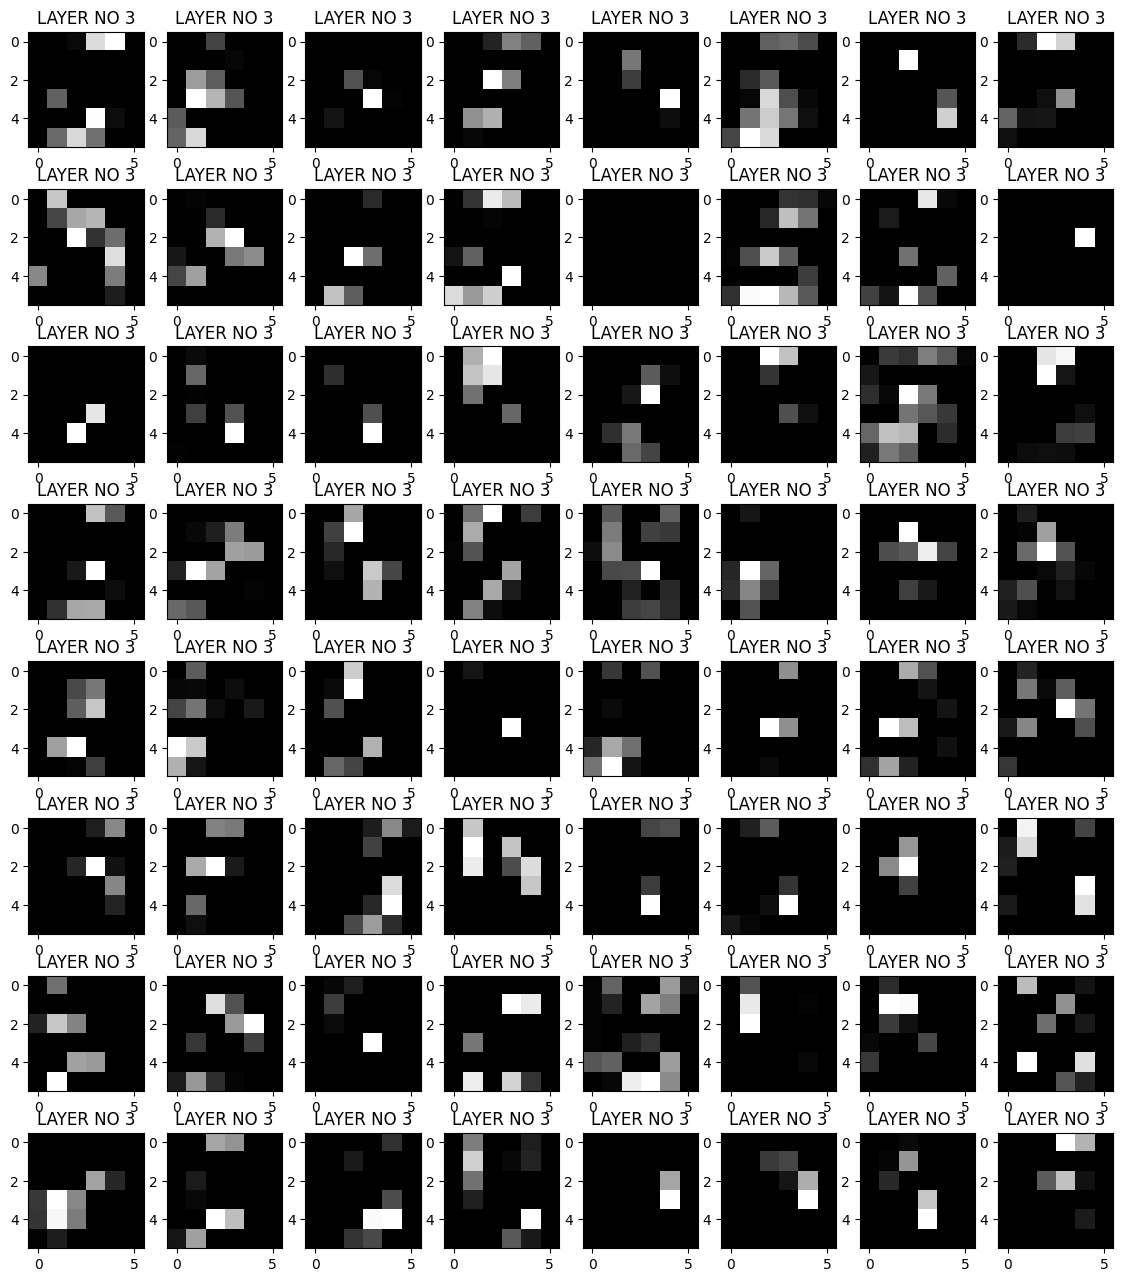

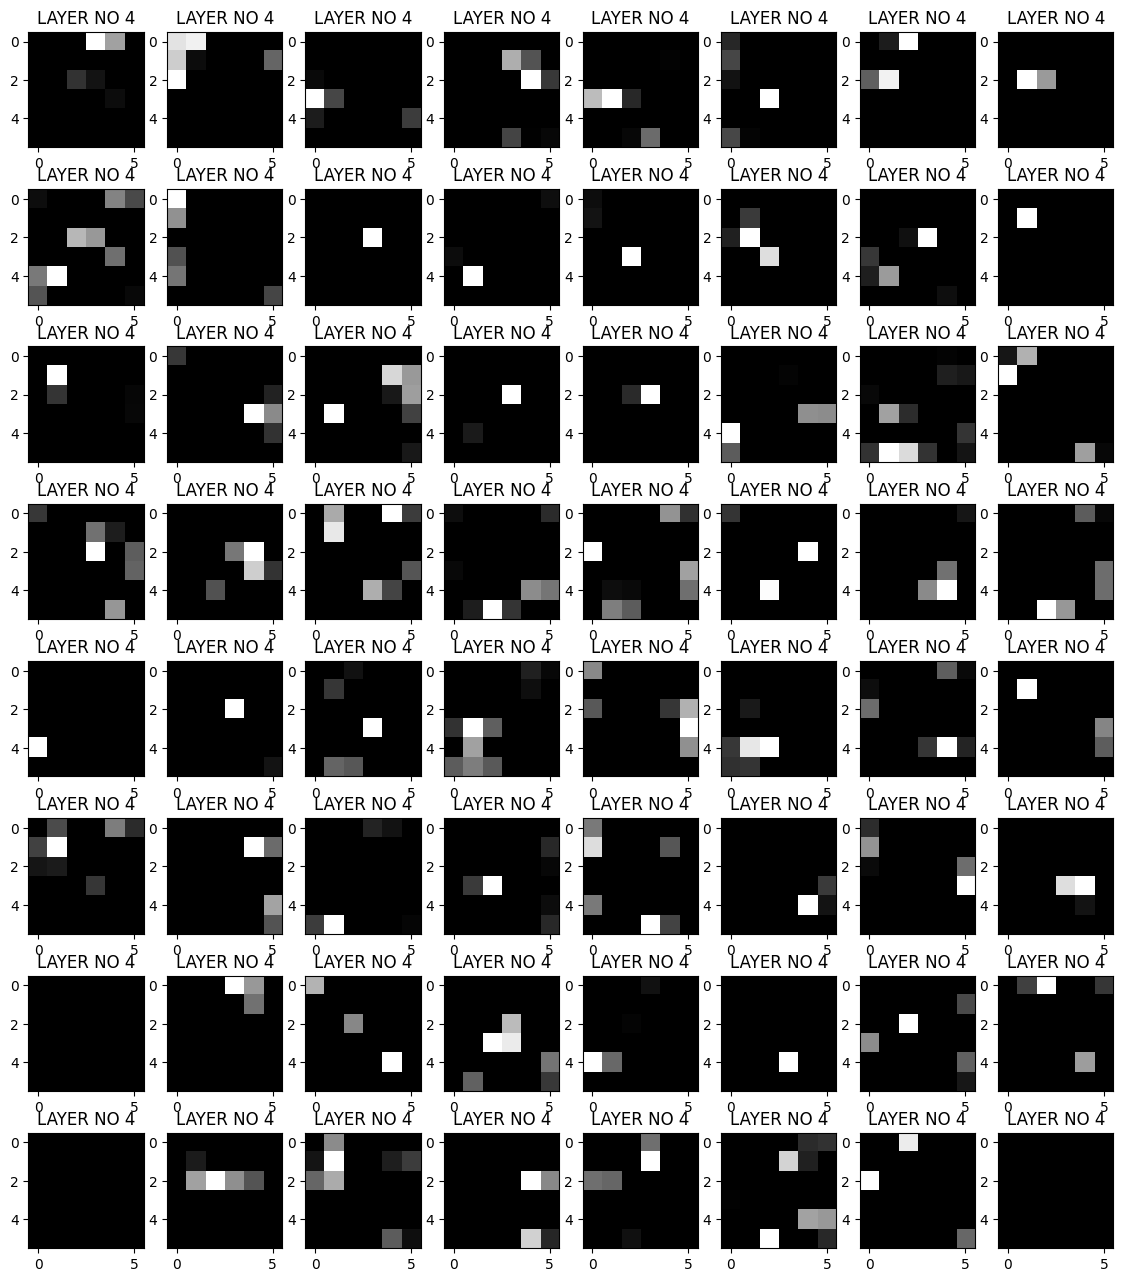

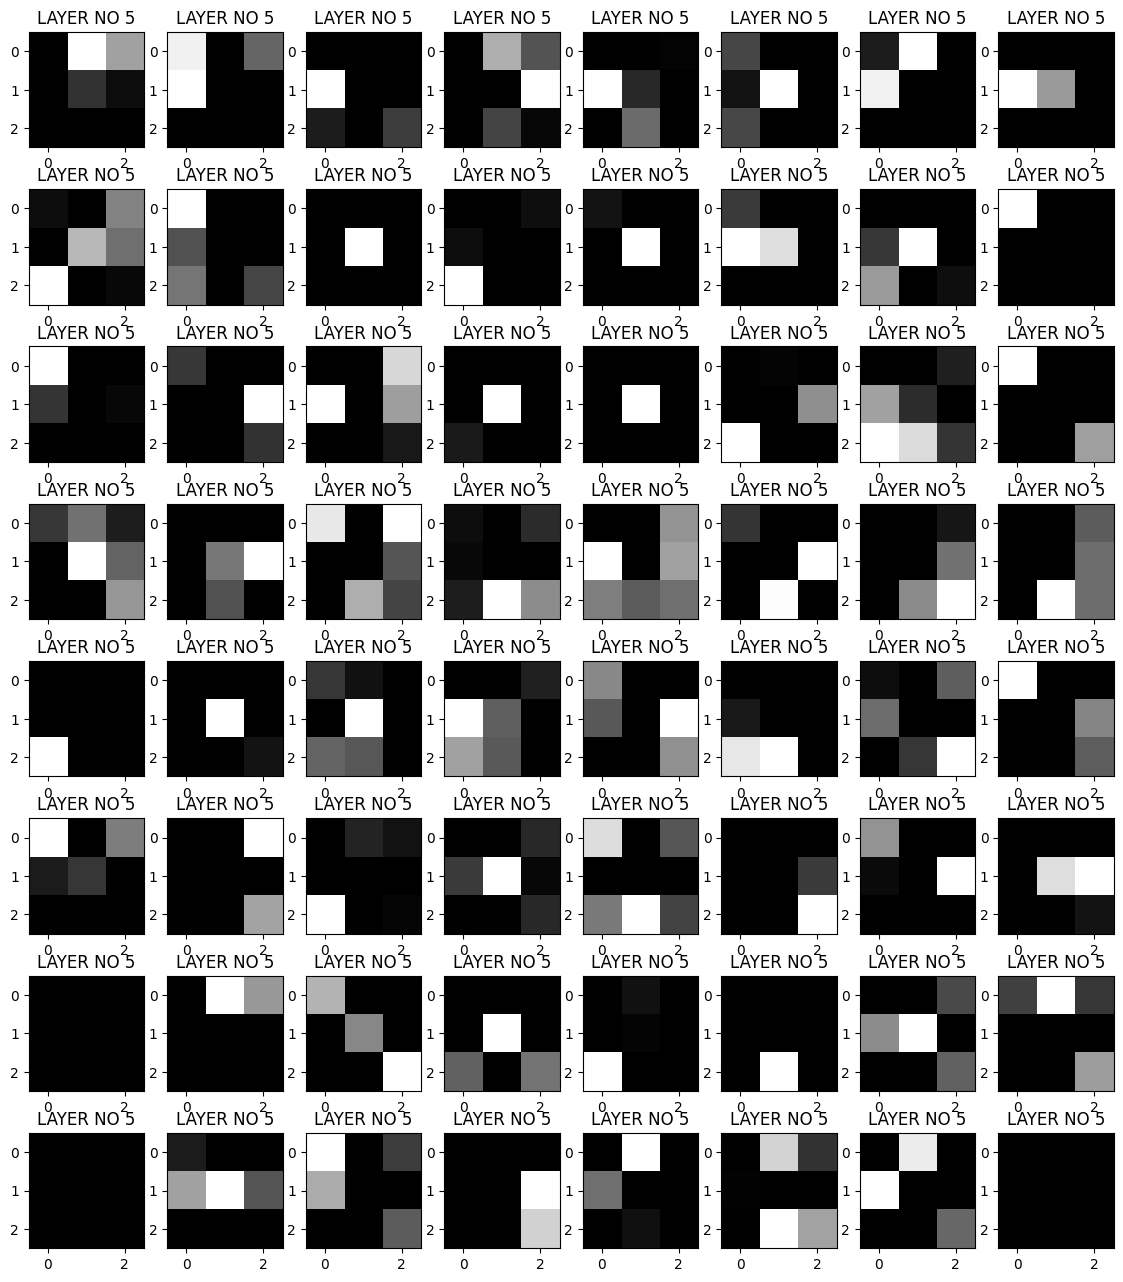

In [23]:
for j in range(6):
    feature_map_model = tf.keras.models.Model(inputs=model.input, outputs=model.layers[j].output)
    feature_map = feature_map_model.predict(own_digits[51].reshape((-1, 28, 28, 1)))
    fig, axes = plt.subplots(8, 8, figsize=(14, 16))
    for i, ax in enumerate(axes.flat):
        ax.set_title(f'LAYER NO {j}')
        ax.imshow(feature_map[0, :, :, i], cmap='gray')
    
        

In [24]:
model.save('cnnModel')

INFO:tensorflow:Assets written to: cnnModel\assets


INFO:tensorflow:Assets written to: cnnModel\assets
